In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyrsm as rsm
import warnings
warnings.filterwarnings('ignore')

# Croq'Pain

You can find the Croq'Pain case on pages 299-306 in the textbook, _Data, Models, and Decisions_. Please use the data set provided and not the data from the book.

`CroqPain.parquet` is the full data set that includes all stores as well as a set of 10 potential new store locations. Below, we provide some extra guidance as you work through each part of the case.

### Before you start ...

There is a problem in the data file `CroqPain.parquet` (i.e., the data needs some 'cleaning'). Find the issue and propose a fix before you continue with the analysis.

* Hint: Check data histograms

Post questions on Piazza as needed. Discuss your "fix" with the TAs during a work session or post your proposed data "fix" on Piazza as a private post. Apply your fix and "store" it into a dataset called `CroqPainFix`.

In [121]:
df = pd.read_parquet("CroqPain.parquet")
df.head()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,


In [122]:
df.describe()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI
count,70.000000,60.000000,70.000000,70.000000,60.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.500000,614.812261,832.969006,121.257143,10.75000,17.403714,2.836857,2.612429,3.360714,3.389100,4.082286,31.211429,3.271429,5.957143,29.385714,16.557143,128.071429
std,20.351085,3641.044163,254.008030,54.264966,3.56834,6.321692,1.248883,1.224226,1.747099,1.614032,1.458006,3.510008,2.558993,3.394094,22.016656,6.072546,8.033122
min,1.000000,-42.979570,504.273400,52.000000,4.00000,3.500000,0.260000,0.060000,0.250000,0.580000,0.910000,23.000000,0.000000,0.000000,5.000000,7.600000,110.000000
25%,18.250000,76.978270,652.580500,84.250000,8.00000,12.282500,1.885000,1.780000,2.132500,2.000000,2.970000,28.625000,1.000000,3.000000,12.250000,12.350000,122.000000
50%,35.500000,140.702808,753.745900,98.000000,11.00000,17.310000,2.800000,2.505000,3.285000,3.565000,4.050000,30.150000,2.000000,5.000000,23.000000,14.200000,129.000000
75%,52.750000,214.354711,907.042450,148.250000,14.00000,22.502500,3.942500,3.515000,4.982500,4.867500,5.270000,33.975000,4.750000,8.000000,42.500000,19.875000,134.000000
max,70.000000,28339.672620,1719.523600,285.000000,17.00000,30.020000,5.150000,5.540000,6.280000,5.990000,6.720000,38.800000,12.000000,14.000000,96.000000,33.400000,142.000000


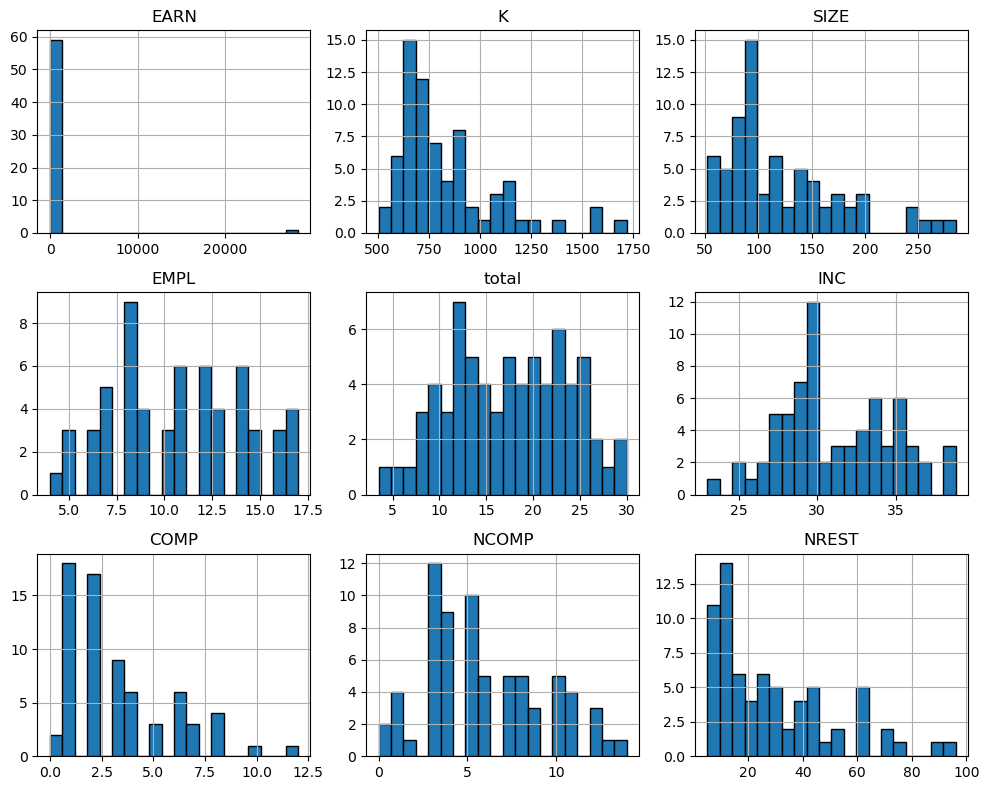

In [123]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# List of columns to plot
columns_to_plot = ['EARN', 'K', 'SIZE', 'EMPL', 'total', 'INC', 'COMP', 'NCOMP', 'NREST']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]
    df[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

- There is an outlier in the first histogram.

In [124]:
# EARN: Earnings in $1,000. Operating earnings: annual sales minus annual operating costs. Operating costs exclude the fixed
# costs of property rent and equipment rental (all capital equipment is purchased by headquarters  and rented to the stores). 
# Operating costs include variable costs such as salaries, utilities,  supplies, inventories and other expenses.

df['EARN'][0] = df['EARN'][0] / 1000

df.head()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28.339673,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,


In [125]:
df.shape

(70, 18)

In [126]:
df.drop_duplicates(inplace=True)

In [127]:
df.shape

(70, 18)

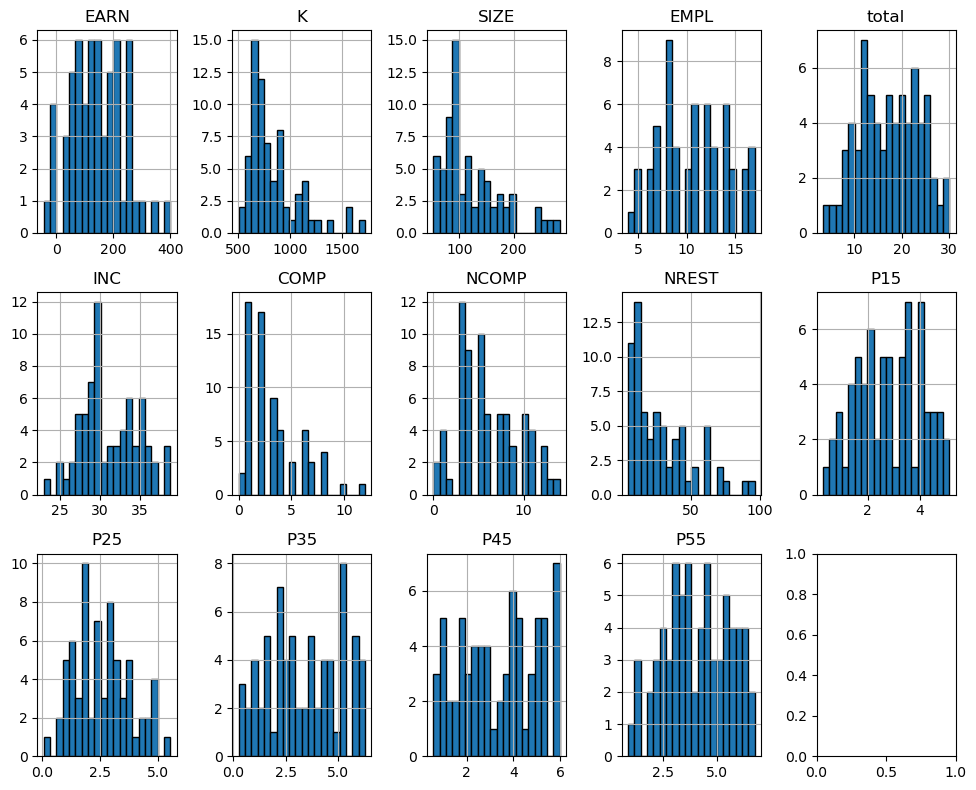

In [128]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 8))

columns_to_plot = ['EARN', 'K', 'SIZE', 'EMPL', 'total', 'INC', 'COMP', 'NCOMP', 'NREST', 'P15', 'P25', 'P35', 'P45', 'P55']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // 5, i % 5]
    df[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [129]:
CroqPainFix = df.copy()

CroqPainFix_pred = CroqPainFix.copy()

CroqPainFix.dropna(inplace=True)
CroqPainFix.shape

(60, 18)

### Part (a)

Visualize the data: examine histograms and scatterplots. Look at correlations between variables and try to identify sources of concern. Pay particular attention to the correlation for `total` and `P15` through `P55`. Do these correlations make sense to you?

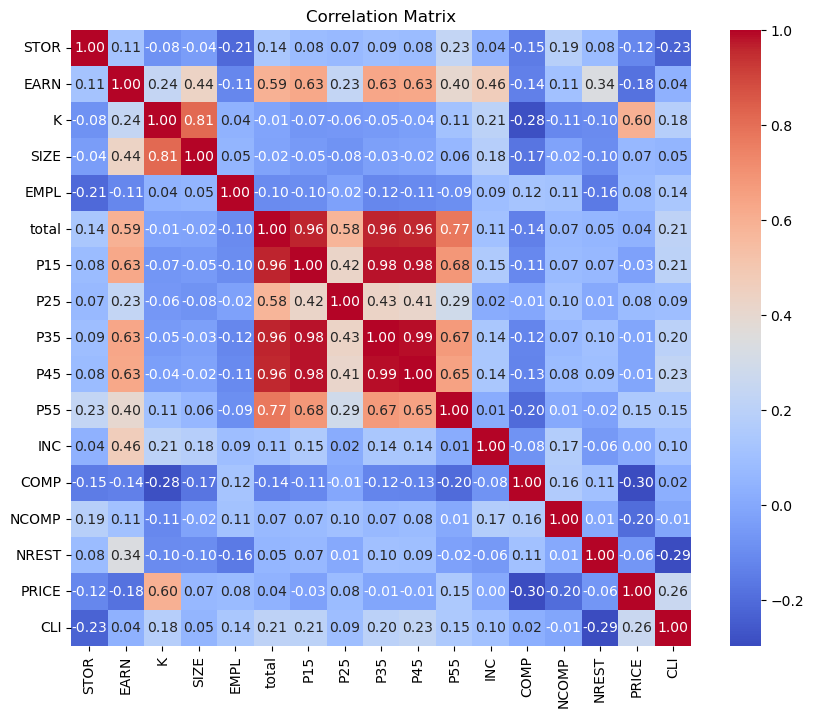

In [130]:
CroqPainFix_new = CroqPainFix.dropna(axis=0)
CroqPainFix_new.drop(['CITY'], axis=1, inplace=True)

corr_matrix = CroqPainFix_new.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

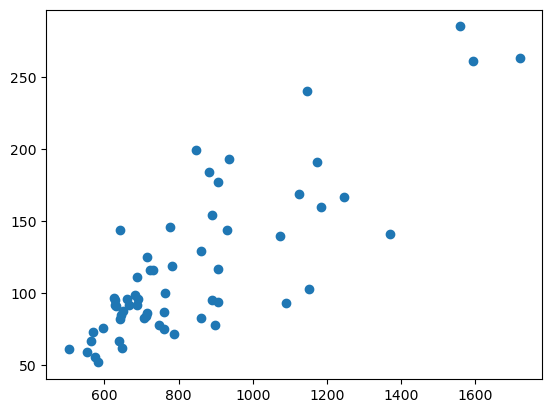

In [131]:
plt.scatter(CroqPainFix['K'], CroqPainFix['SIZE'])

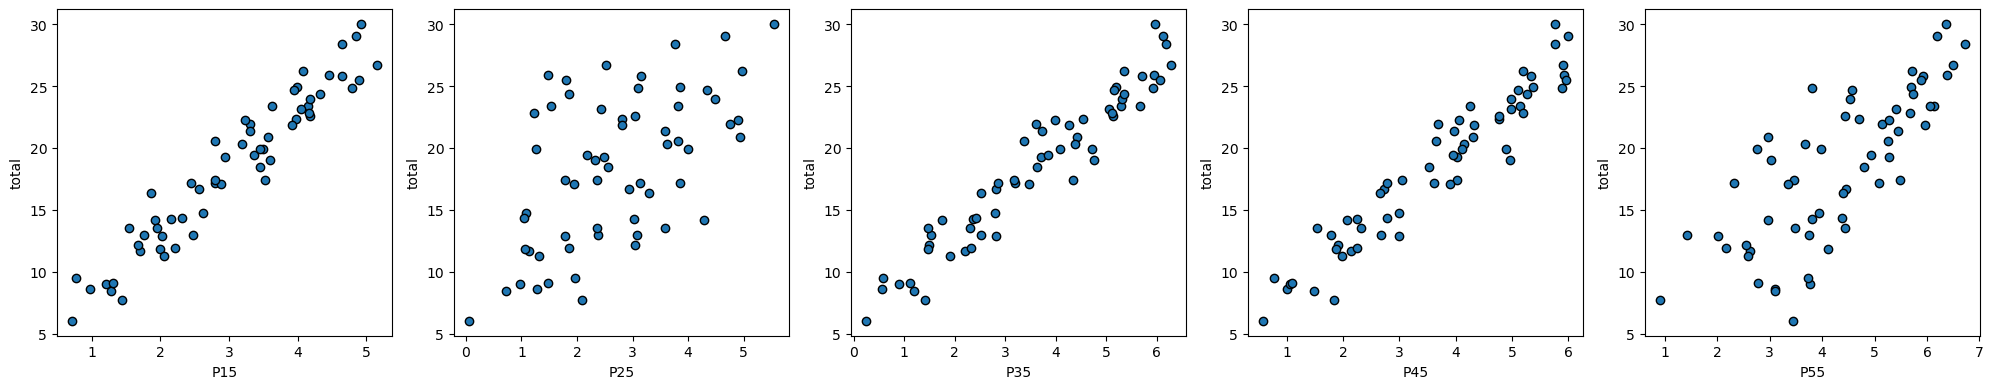

In [132]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Age columns to plot against 'total'
age_columns = ['P15', 'P25', 'P35', 'P45', 'P55']

# Creating scatter plots
for i, age_col in enumerate(age_columns):
    ax = axes[i]
    ax.scatter(CroqPainFix[age_col], CroqPainFix['total'], edgecolor='black')
    ax.set_xlabel(age_col)
    ax.set_ylabel('total')

plt.tight_layout()
plt.show()

- After removing the row with the outlier, the EARN is now more distributed.
- Looking at the the other histograms, we can see that the variables K, SIZE, COMP, NCOMP, NREST are skewed to the right. 
- The P15, P35 and P45 show strong linear relationships with total.
- The correlation between K and SIZE is high, which makes sense because the larger the store, the more investment it will have.

Apply a transformation to the variables `EARN`, `P15`, `P25`, `P35`, `P45`, `P55`, `COMP`, `NCOMP`, and `NREST` where you normalize them by `total`. You can apply this normalization by defining new variables such as `EARN_total` which is equal to `EARN` divided by `total`.

In [133]:
variables_to_normalize = ['EARN', 'P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']

for var in variables_to_normalize:
    CroqPainFix[f'{var}_total'] = CroqPainFix[var] / CroqPainFix['total']

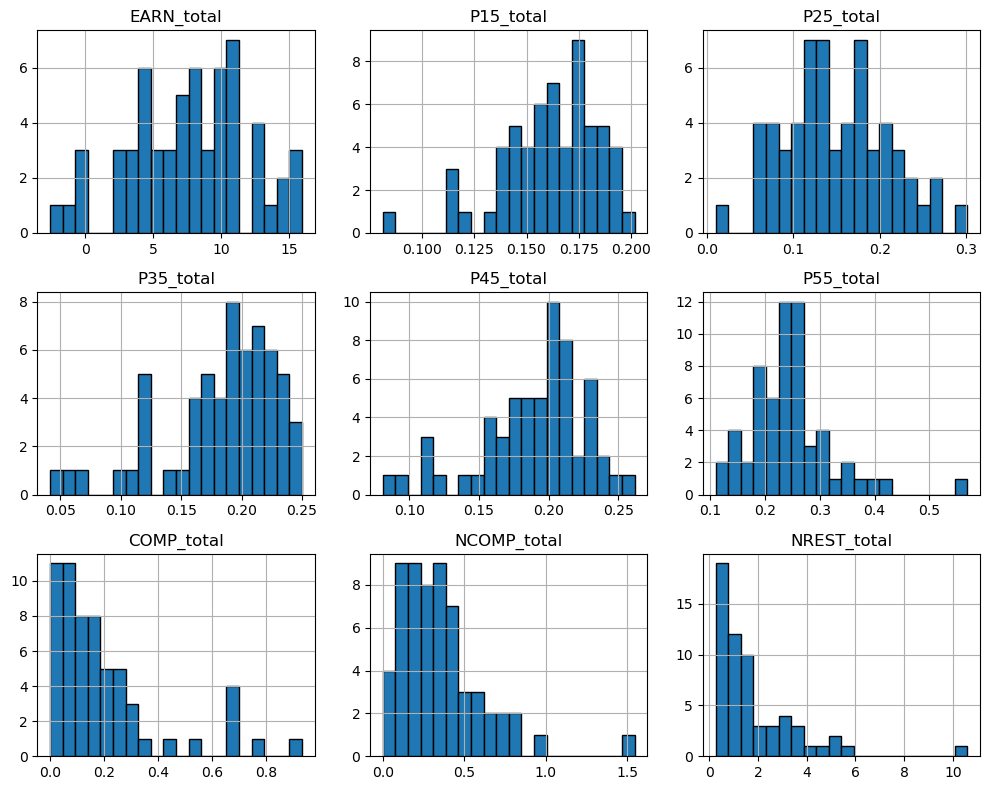

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# List of columns to plot
columns_to_plot = ['EARN_total','P15_total','P25_total','P35_total','P45_total','P55_total','COMP_total','NCOMP_total','NREST_total']

for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]
    CroqPainFix[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(col)

plt.tight_layout()
plt.show()

Evaluate correlations and regressions with both the transformed and un-transformed data. Which do you prefer and why?

When you run regressions, be sure to use the `VIF` feature in Radiant for a more rigorous evaluation of multicollinearity. As you are building a model, it can also be useful to examine standardized coefficients. Also, conduct linear regression validation checks by using the `dashboard` plots in the `Plots` tab (see section 6.6 in the book).

If interested, you can experiment with the `Stepwise selection` option in the _Summary_ tab (i.e., click the checkbox) in the R version of Radiant (launched from RStudio). This is a feature in Radiant that uses a purely statistical approach to model building based on the Akaike Information Criterion (AIC). It will go through a series of steps and recommend a final model (see the bottom of the output). Compare the model selected using `Stepwise selection` to the model you arrived at yourself. Be critical and make a decision about the final model to recommend for Croq`Pain.

In [135]:
reg = rsm.regress({"croq": CroqPainFix}, rvar="EARN", evar=['P15','SIZE','K','INC','NREST'])
reg.summary(vif=True)

Linear regression (OLS)
Data                 : croq
Response variable    : EARN
Explanatory variables: P15, SIZE, K, INC, NREST
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value     
Intercept      -372.86     45.709   -8.157  < .001  ***
P15              43.52      3.934   11.062  < .001  ***
SIZE              1.21      0.147    8.256  < .001  ***
K                -0.12      0.030   -3.871  < .001  ***
INC               9.46      1.456    6.499  < .001  ***
NREST             1.42      0.205    6.960  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.864, Adjusted R-squared: 0.851
F-statistic: 68.461 df(5, 54), p.value < 0.001
Nr obs: 60

Variance inflation factors:

         vif    Rsq
K      3.013  0.668
SIZE   2.965  0.663
INC    1.081  0.075
P15    1.041  0.039
NREST  1.018  0.017


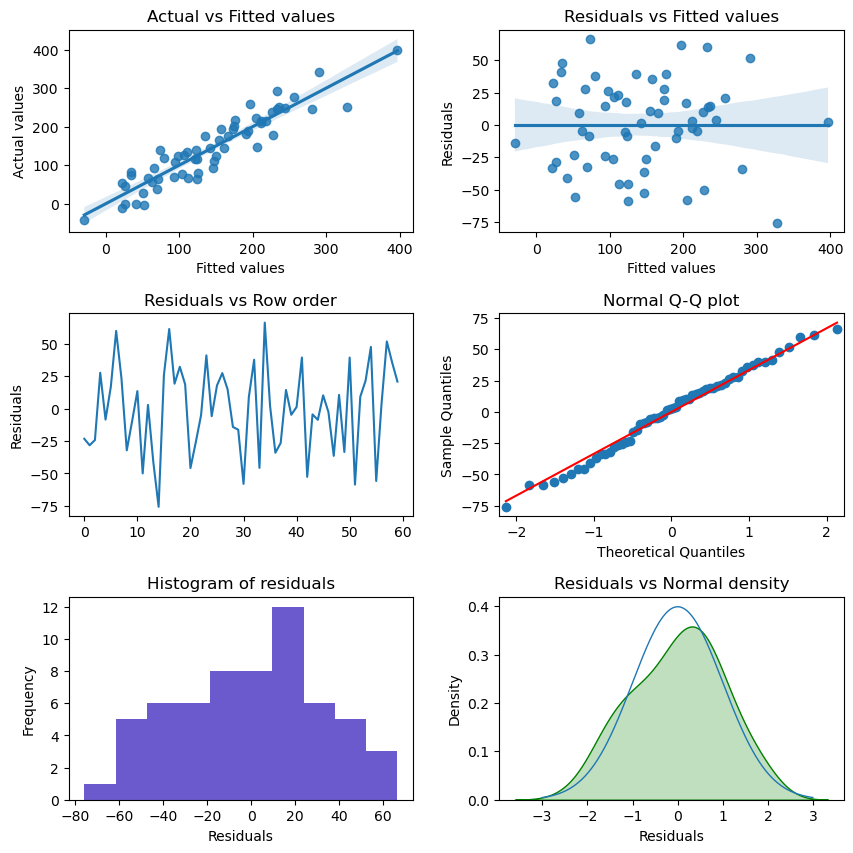

In [136]:
reg.plot('dashboard')

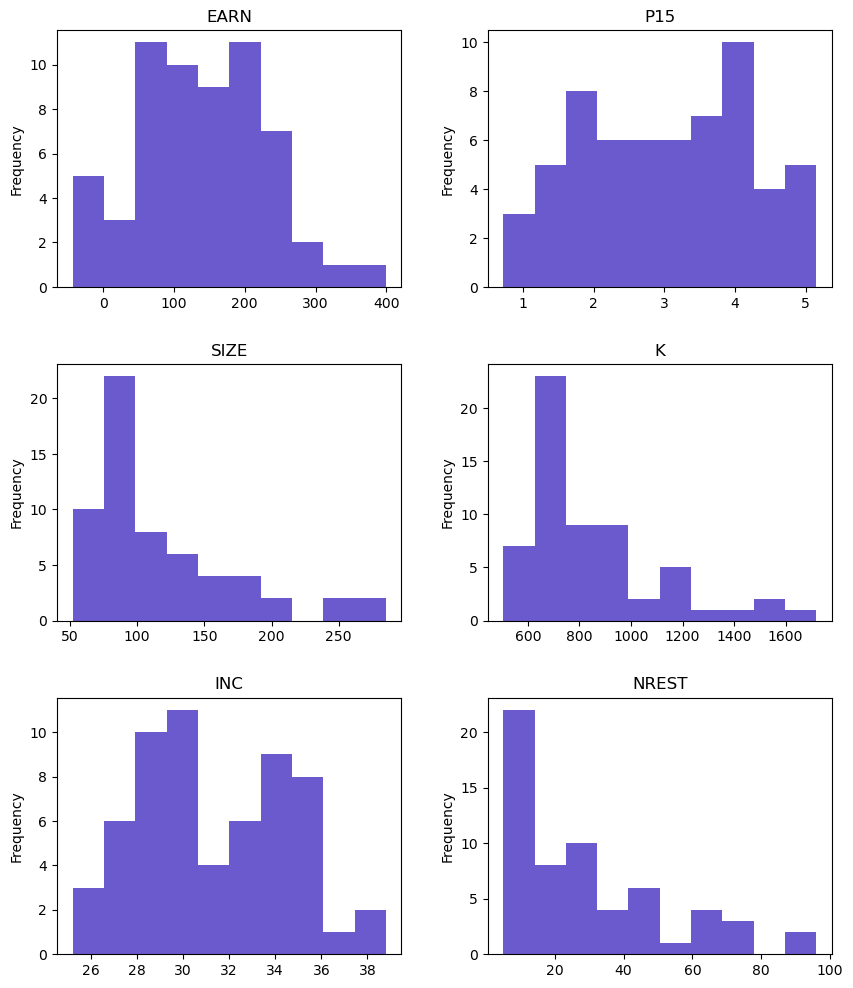

In [137]:
reg.plot('dist')

In [138]:
CroqPainFix['K_ln'] = np.log(CroqPainFix['K'])
CroqPainFix['SIZE_ln'] = np.log(CroqPainFix['SIZE'])
CroqPainFix.head()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,...,P15_total,P25_total,P35_total,P45_total,P55_total,COMP_total,NCOMP_total,NREST_total,K_ln,SIZE_ln
0,1,28.339673,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,...,0.114219,0.149184,0.065268,0.116550,0.361305,0.932401,0.116550,5.244755,6.758178,4.859812
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,...,0.152482,0.085106,0.141844,0.176123,0.366430,0.236407,0.236407,3.191489,6.446200,4.510860
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,...,0.152727,0.129351,0.192727,0.209351,0.273766,0.259740,0.207792,0.259740,6.979551,4.941642
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,...,0.170650,0.235660,0.211281,0.205545,0.141491,0.095602,0.047801,0.334608,6.782199,5.214936
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,...,0.145798,0.097770,0.188679,0.183533,0.225557,0.085763,0.257290,2.144082,6.835903,4.969813


In [139]:
reg2 = rsm.regress({"croq": CroqPainFix}, rvar="EARN_total", evar=['P15_total','SIZE_ln','K_ln', 'INC', 'NREST_total'])
reg2.summary(vif=True)

Linear regression (OLS)
Data                 : croq
Response variable    : EARN_total
Explanatory variables: P15_total, SIZE_ln, K_ln, INC, NREST_total
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -25.58      9.722   -2.632   0.011    *
P15_total          61.62     14.798    4.164  < .001  ***
SIZE_ln             8.73      1.268    6.884  < .001  ***
K_ln               -5.33      1.874   -2.845   0.006   **
INC                 0.52      0.101    5.119  < .001  ***
NREST_total         1.05      0.186    5.659  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.709, Adjusted R-squared: 0.682
F-statistic: 26.346 df(5, 54), p.value < 0.001
Nr obs: 60

Variance inflation factors:

               vif    Rsq
K_ln         2.820  0.645
SIZE_ln      2.717  0.632
P15_total    1.230  0.187
NREST_total  1.115  0.103
INC         

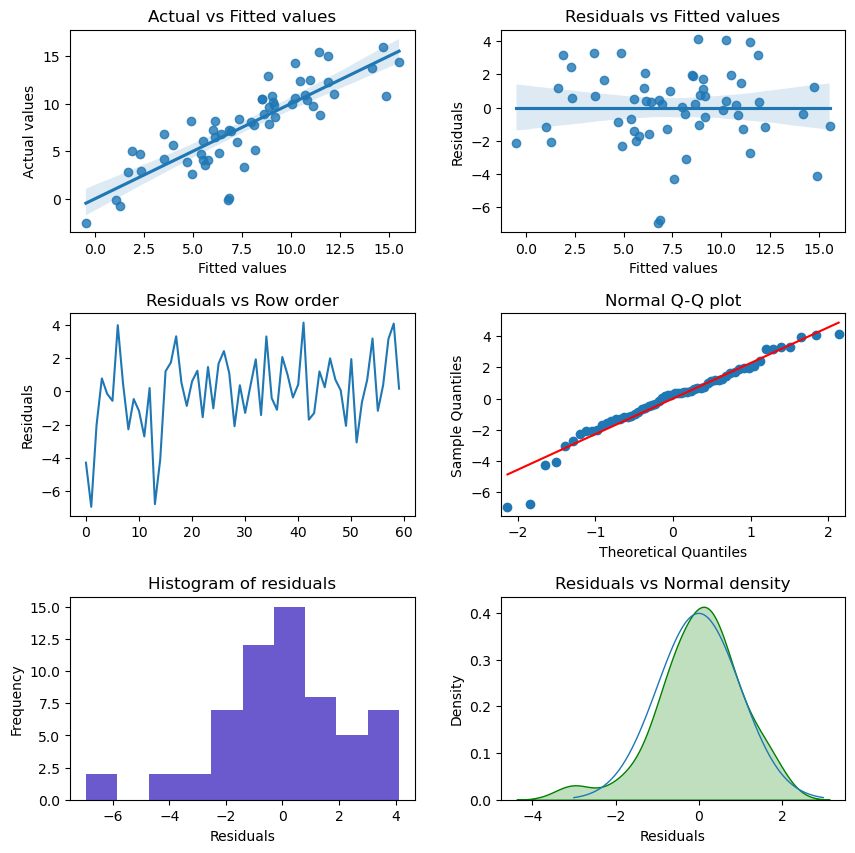

In [140]:
reg2.plot('dashboard')

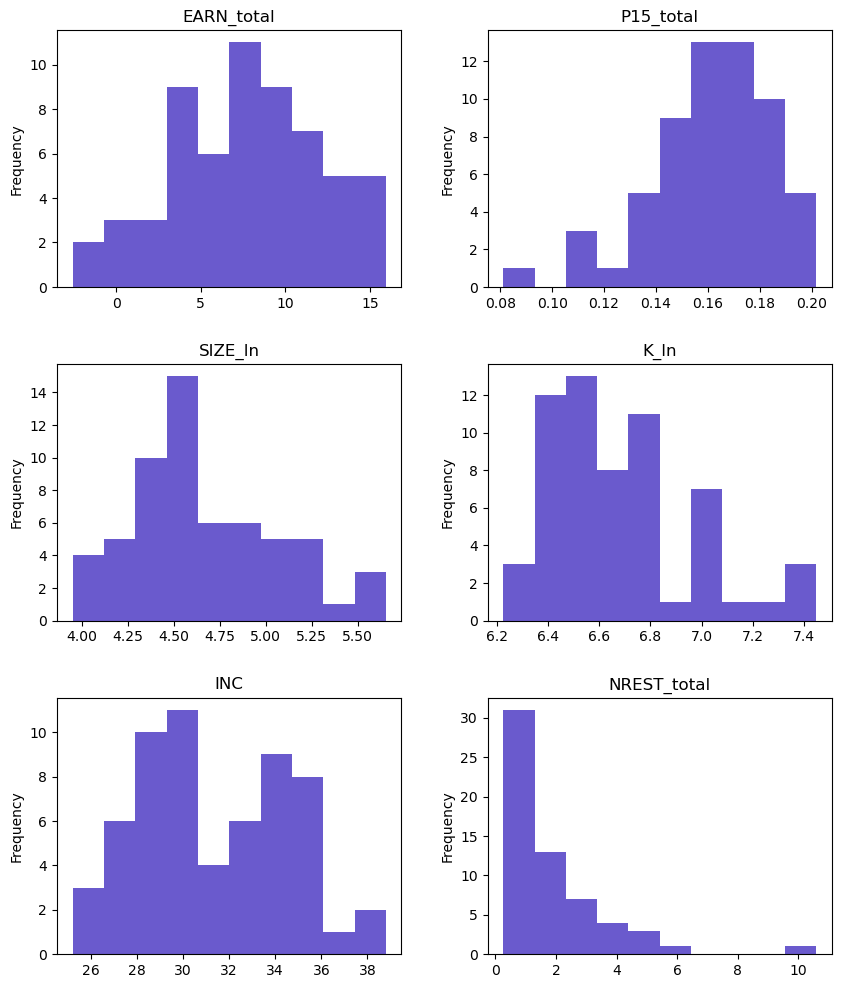

In [141]:
reg2.plot('dist')

### Part (b)

Remember to use a subset of the `CroqPainFix` data with only the 50 stores opened up prior to 1994. After you build your regression model using `CroqPainFix` select the `Predict` tab in Radiant.


In [142]:
for i,r in CroqPainFix_pred[-10:].iterrows():
    pred = reg2.predict(cmd = {'P15_total': [r['P15']/r['total']], 'SIZE_ln': [np.log(r['SIZE'])], 'K_ln': [np.log(r['K'])], 'INC':[r['INC']], 'NREST_total':[r['NREST']/r['total']]})
    CroqPainFix_pred['EARN'][i] = pred['prediction']*CroqPainFix_pred['total'][i]

CroqPainFix_pred.tail(10)

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
60,61,18.573746,660.1396,54,NaN,6.71,0.60,2.57,0.43,0.690,1.44,38.4,4,5,18,21.7,131,Calais
61,62,71.115299,733.0000,120,NaN,11.04,1.30,1.40,2.11,1.090,2.68,31.3,7,6,21,12.5,115,Montchanin
62,63,91.612176,1050.3490,135,NaN,11.91,2.21,1.85,2.33,2.240,2.17,29.0,1,4,13,21.7,135,Aubusson
63,64,338.838458,836.0000,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse
64,65,35.665106,783.6160,96,NaN,3.50,0.26,0.70,0.50,1.200,2.00,30.0,12,7,38,18.0,130,Torcy
65,66,93.738860,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1
66,67,-7.945196,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2
67,68,55.132452,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont
68,69,160.342128,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier
69,70,175.906074,681.0000,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon


### Part (c)

In [143]:
CroqPainFix_pred['Performane_ratio'] = CroqPainFix_pred['EARN'] / CroqPainFix_pred['K']

CroqPainFix_pred.tail(10)

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY,Performane_ratio
60,61,18.573746,660.1396,54,NaN,6.71,0.60,2.57,0.43,0.690,1.44,38.4,4,5,18,21.7,131,Calais,0.028136
61,62,71.115299,733.0000,120,NaN,11.04,1.30,1.40,2.11,1.090,2.68,31.3,7,6,21,12.5,115,Montchanin,0.097020
62,63,91.612176,1050.3490,135,NaN,11.91,2.21,1.85,2.33,2.240,2.17,29.0,1,4,13,21.7,135,Aubusson,0.087221
63,64,338.838458,836.0000,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse,0.405309
64,65,35.665106,783.6160,96,NaN,3.50,0.26,0.70,0.50,1.200,2.00,30.0,12,7,38,18.0,130,Torcy,0.045513
65,66,93.738860,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1,0.101360
66,67,-7.945196,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2,-0.007292
67,68,55.132452,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont,0.074739
68,69,160.342128,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier,0.274558
69,70,175.906074,681.0000,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon,0.258306


In [144]:
CroqPainFix_pred[(round(CroqPainFix_pred['Performane_ratio'],2) >= 0.26) & (CroqPainFix_pred['EMPL'].isna())].sort_values(by=['EARN','Performane_ratio'], ascending=False)

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY,Performane_ratio
63,64,338.838458,836.0,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse,0.405309
69,70,175.906074,681.0,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon,0.258306
68,69,160.342128,584.0,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier,0.274558


This part can be completed using the same Radiant features applied earlier.

---
Copyright (c), 2018 by Vincent Nijs, Rady School of Management,
University of	California, San Diego, Otterson Hall, 3W116,
9500 Gilman Drive, MC 0553, La Jolla, California 92093-0553,
e-mail: vnijs@ucsd.edu